In [226]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import numpy.linalg as la
import scipy.optimize as op
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot as plt

The ex1data1.txt contains the dataset for our linear regression problem. 
The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss

# Week 1-2, Ex1

## Linear regression with one variable

### Load data

In [283]:
cols1 = ['pop', 'profit']
data1 = pd.read_csv('ex1/ex1data1.txt', header = None, names = cols1)

### Plot the data

In [284]:
data1.shape

(97, 2)

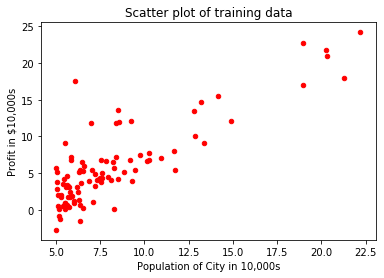

In [285]:
data1.plot(kind='scatter',x='pop',y='profit',color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')
plt.show()

### Gradient Descent

In [448]:
X = pd.DataFrame(data1['pop']).to_numpy()
y = pd.DataFrame(data1['profit']).to_numpy()

# Add a column of ones to X
myX = np.append(np.ones([len(X),1]), X ,1)
myX = myX.T
y = y.T
# Initialize fitting parameters
d = myX.shape[0] # Dimensions of theta / number of features
theta = np.zeros((d, 1));

In [449]:
print('myX shape:', myX.shape)
print('theta shape:', theta.shape)
print('y shape:', y.shape)

myX shape: (2, 97)
theta shape: (2, 1)
y shape: (1, 97)


In [450]:
iterations = 50;
alpha = 0.01;

In [451]:
loss = []
for i in range(iterations):
    # Cost function: mean squared error as a function of theta 1, 2, ..., d
    J_theta = ((theta.T @ myX - y) @ (theta.T @ myX - y).T / (2 * len(y))).item()
    #print('J_theta:', J_theta)
    
    delta_J_0 = np.mean(theta.T @ myX - y, axis=1).item()
    delta_J_1 = ((theta.T @ myX - y) @ (myX[1, :].T / y.shape[1])).item()
    
    if (np.absolute(delta_J_0) > 0.0001 and np.absolute(delta_J_1) > 0.0001):
        delta = np.array([delta_J_0, delta_J_1]).reshape(-1,1)
        theta = theta - alpha * delta
        
        loss.append(J_theta)
        i +=1
    else:
        break

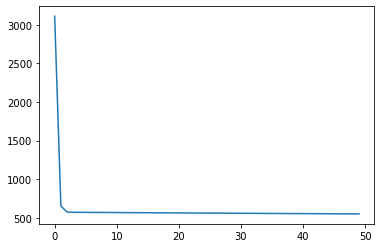

In [452]:
plt.plot(loss)
#plt.yscale('log')

In [433]:
theta

array([[-0.86287834],
       [ 0.88834569]])

In [436]:
predict1 = theta.T @ [1, 3.5] ;
predict2 = theta.T @ [1, 7] ;

In [453]:
predict1, predict2

(array([2.24633156]), array([5.35554147]))

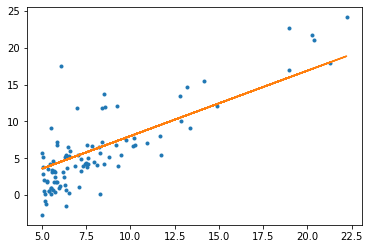

In [443]:
plt.plot(data1['pop'], data1['profit'], '.')
plt.plot(X, theta[0] + theta[1] * X, '-')
plt.show()

## Linear regression with multiple variables

### Plot the data

The ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [456]:
cols2 = ['size', 'num_of_bedrooms', 'housing_price']
data2 = pd.read_csv('ex1/ex1data2.txt', header = None, names = cols2)

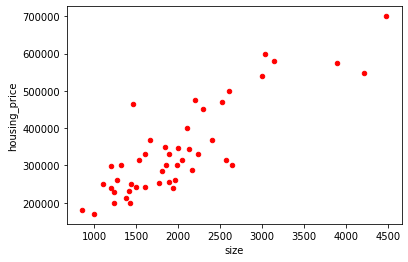

In [460]:
data2.plot(kind='scatter',x='size',y='housing_price',color='red')
plt.show()

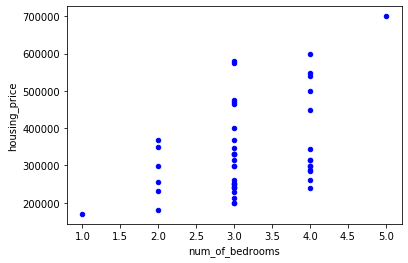

In [462]:
data2.plot(kind='scatter',x='num_of_bedrooms',y='housing_price',color='blue')
plt.show()

### Feature normalization

In [614]:
# pandas.DataFrame.values: Return a Numpy representation of the DataFrame.
X = data2[['size','num_of_bedrooms']].values
y = pd.DataFrame(data2['housing_price']).to_numpy()

# Transpose X to make it [d,n], where d is dimension of features, n is number of samples
X = X.T
y = y.T

In [652]:
def feature_norm(X):
    d = X.shape[0]
    n = X.shape[1]
    X_norm = np.zeros(X.shape)
    for d in range(X.shape[0]):
        mean = np.mean(X[d, :])
        std = np.std(X[d, :])
        print(mean, std)
        X_norm[d, :] = (X[d, :] - mean)/std
    return X_norm, mean, std

In [653]:
X_norm, mean, std = feature_norm(X)

2000.6808510638298 786.2026187430467
3.1702127659574466 0.7528428090618781


In [617]:
# Add a row of ones to X
myX = np.append(np.ones([1, X.shape[1]]), X_norm ,0)

In [618]:
print('myX shape:', myX.shape)
print('theta shape:', theta.shape)
print('y shape:', y.shape)

myX shape: (3, 47)
theta shape: (3, 1)
y shape: (1, 47)


### Gradient Descent with multiple variables

In [624]:
def gradient_descent(iterations, alpha, myX, y):
    # Initialize fitting parameters
    d = myX.shape[0] # Dimensions of theta / number of features
    theta = np.zeros((d, 1));
    loss = []
    for i in range(iterations):
        # Cost function: mean squared error as a function of theta 1, 2, ..., d
        J_theta =((theta.T @ myX - y) @ (theta.T @ myX - y).T / (2 * len(y))).item()
        n = y.shape[1]
        delta = ((theta.T @ myX - y) @ myX.T / n).T
        theta = theta - alpha * delta
        loss.append(J_theta)
        i +=1
    return theta, loss

In [626]:
theta1, loss1 = gradient_descent(500, 0.01, myX, y)

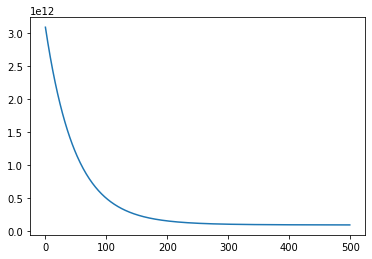

In [627]:
plt.plot(loss1)
#plt.yscale('log')

### Selecting learning rate

In [646]:
theta1, loss1 = gradient_descent(500, 0.01, myX)
theta2, loss2 = gradient_descent(500, 0.03, myX)
theta3, loss3 = gradient_descent(500, 0.1, myX)
theta4, loss4 = gradient_descent(500, 0.3, myX)
theta5, loss5 = gradient_descent(500, 1, myX)

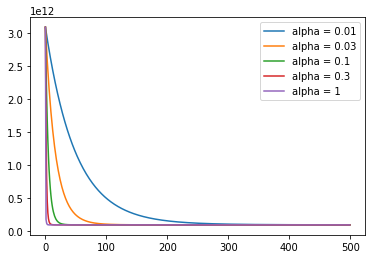

In [647]:
plt.plot(loss1, label='alpha = 0.01')
plt.plot(loss2, label='alpha = 0.03')
plt.plot(loss3, label='alpha = 0.1')
plt.plot(loss4, label='alpha = 0.3')
plt.plot(loss5, label='alpha = 1')
plt.legend()

In [648]:
theta1, theta2, theta3, theta4, theta5

(array([[ 3.38175984e+05],
        [ 1.03032124e+05],
        [-2.02325233e+02]]), array([[340412.57680449],
        [109372.3081412 ],
        [ -6502.86652974]]), array([[340412.65957447],
        [109447.79645983],
        [ -6578.35484435]]), array([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]]), array([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]]))

### Made a prediction

In [654]:
X_test = [(1650 - 2000.6808510638298)/786.2026187430467, (3-3.1702127659574466)/0.7528428090618781]

In [655]:
X_test

[-0.4460438603276164, -0.2260933675776883]

In [656]:
X_test = [1, -0.4460438603276164, -0.2260933675776883]

In [657]:
theta5.T @ X_test

array([293081.4643349])

## Normal Equations

theta = (inv(X.T @ X)) @ X.T @ y

In [659]:
X = data2[['size','num_of_bedrooms']].values

X = np.append(np.ones([len(X),1]), X ,1)

y = pd.DataFrame(data2['housing_price']).to_numpy()



In [661]:
theta = (la.inv(X.T @ X)) @ X.T @ y

In [662]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [665]:
X_test = [1, 1650, 3]

In [666]:
theta.T @ X_test

array([293081.4643349])

# Week 3 - Ex2

## Logistic Regression - Plot data

In [10]:
cols1 = ['exam1_score', 'exam2_score', 'admitted']
data1 = pd.read_csv('machine-learning-ex2/ex2/ex2data1.txt', header = None, names = cols1)

In [11]:
data1

,exam1_score,exam2_score,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [32]:
data1.shape

(100, 3)

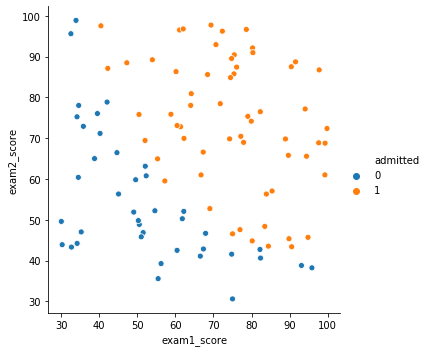

In [15]:
sns.relplot(x="exam1_score", y="exam2_score", 
            hue="admitted", kind="scatter",
            data=data1);

## Implementation

### Sigmoid function

Your first step is to implement this function so it can be called by the rest of your program. When you are fnished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [216]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [30]:
# Test: 
sigmoid(0)
sigmoid(10)
sigmoid(-10)

4.5397868702434395e-05

In [476]:
x = np.array([0,1,2])
y = np.array([[1,0,2],[3,2,5]])
sigmoid(x)
sigmoid(y)

array([[0.73105858, 0.5       , 0.88079708],
       [0.95257413, 0.88079708, 0.99330715]])

### Cost function and gradient

In [31]:
### Function to return the cost and gradient

In [505]:
# Prepare training dataset
# Assume features include only the first-order exam scores. Therefore g(X) = theta0 + theta1 * x1 + theta * x2
X = data1[['exam1_score', 'exam2_score']].values
y = data1['admitted'].to_numpy()

# Input X has dimensions (n, d), y has dimensions (n,1)
myX = np.append(np.ones([len(X),1]), X ,1)
y = y.reshape(-1,1) 

In [524]:
# Initialize theta. theta has dimensions (d,1)
d = myX.shape[1]
theta = np.zeros([d, 1])

In [525]:
gX = myX @ theta
hX = sigmoid(gX)
loss = (-1/len(y) * (y.T @ np.log(hX) + (1-y).T @ np.log(1-hX))).item()
derivative= 1/len(y) * myX.T @ (hX - y)

theta = theta - alpha * derivative

In [526]:
hX.shape

(100, 1)

In [552]:
def costFunction(theta, X, y):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX)   # hX has shape (N,1)
    n = len(y)   #
    loss = ((1/n) * (- y.T @ np.log(hX) - (1-y).T @ np.log(1-hX))).item()
    #derivative = (1/n) * myX.T @ (hX - y)
    return loss

def gradientFunction(theta, X, y):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX).reshape(-1, 1)   # hX has shape (N,1)
    n = len(y)   #
    derivative = (1/n) * X.T @ (hX - y)
    derivative = derivative.squeeze()
    return derivative


### Learning parameters using Scipy Optimize


Alternative of Octave/Matlab alternative

In [512]:
# Initialize theta
initial_theta = np.zeros((d, 1));

#### scipy.optimize.fmin

In [482]:
## Minimize a function using the downhill simplex algorithm 
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)

In [513]:
Result = op.fmin(func = costFunction, 
                 x0 = initial_theta, 
                 args = (myX, y)
                        );

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [514]:
Result

array([-25.16130062,   0.20623142,   0.20147143])

#### scipy.optimize.fmin_ncg

In [485]:
## Newton-Conjugate-Gradient
## https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

In [500]:
import scipy
scipy.__version__

'1.4.1'

In [515]:
gradientFunction(initial_theta, myX, y)

(3,)


array([ -0.1       , -12.00921659, -11.26284221])

In [520]:
# Test: from https://github.com/scipy/scipy/blob/master/scipy/optimize/tests/test_optimize.py#L344
def func(x):
    F = np.array([[1, 1, 1],
                       [1, 1, 0],
                       [1, 0, 1],
                       [1, 0, 0],
                       [1, 0, 0]])
    K = np.array([1., 0.3, 0.5])
    log_pdot = np.dot(F, x)
    logZ = np.log(sum(np.exp(log_pdot)))
    f = logZ - np.dot(K, x)
    return f


def grad(x):
    F = np.array([[1, 1, 1],
                  [1, 1, 0],
                  [1, 0, 1],
                  [1, 0, 0],
                  [1, 0, 0]])
    K = np.array([1., 0.3, 0.5])    
    log_pdot = np.dot(F, x)
    logZ = np.log(sum(np.exp(log_pdot)))
    p = np.exp(log_pdot - logZ)
    res = np.dot(F.transpose(), p) - K
    print(res.shape)
    return res


startparams = np.zeros(3, np.float64)
retval = op.fmin_ncg(func, startparams, grad,
                     args=(),
                     full_output=False, 
                     retall=False)

(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
Optimization terminated successfully.
         Current function value: 1.559132
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 20
         Hessian evaluations: 0


In [553]:
retval  = op.fmin_ncg(f = costFunction, 
                x0 = initial_theta, 
                fprime = gradientFunction,
                args = (myX, y),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 28
         Function evaluations: 72
         Gradient evaluations: 235
         Hessian evaluations: 0


In [554]:
retval

array([-25.15442442,   0.20617599,   0.20141617])

#### scipy.optimize.fmin_bfgs

In [567]:
# alternative to octave's fminunc, which uses some form of bfgs

In [555]:
retval = op.fmin_bfgs(f = costFunction, 
                x0 = initial_theta, 
                fprime = gradientFunction,
                args = (myX, y),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/Users/juersong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/juersong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in matmul
  """


In [556]:
retval

array([-25.16133284,   0.2062317 ,   0.2014716 ])

#### My gradient descent

In [583]:
def optimizeLogisticRegression(X, y, theta, iterations, alpha):
    loss = []
    for i in range(iterations):
        cost = costFunction(theta, X, y)
        derivative = gradientFunction(theta,X,y).reshape(-1,1)
        theta = theta - alpha * derivative
        loss.append(cost)
        i += 1
    return loss, theta

In [584]:
initial_theta = np.zeros((d, 1));
loss, return_theta = optimizeLogisticRegression(myX, y, initial_theta, iterations=1000000, alpha=0.001)

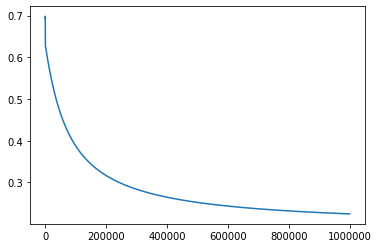

In [585]:
plt.plot(loss)

It takes a very long time and many iterations (1MM) to get it to the converge!

In [588]:
## call your costFunction using the initial parameters of theta. 
## You should see that the cost is about 0.693.
print(loss[0]) 

0.6931471805599453


In [590]:
print(loss[-1])

0.2246541908824744


Compared to scipy optimize functions, which reports "Current function value: 0.203498". After 1MM iterations, it still hasn't converged.

### Predict

In [603]:
def PredictLogisticRegression(X_test, theta):
    gX = X_test @ theta   # gX has shape (N,1)
    hX = sigmoid(gX)   # hX has shape (N,1)
    if X_test @ theta > 0.5:
        y = 1
    else:
        y = 0
    return hX, y

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

In [604]:
X_test = np.array([1, 45, 85])

In [605]:
PredictLogisticRegression(X_test, retval)

(0.776290724058894, 1)

### Plot decision boundary

In [358]:
## theta0 + theta1 * x1 + theta2 * x2 = 0
## ==> x2 = -1/theta2 * (theta0 + theta1 * x1)

In [596]:
retval

array([-25.16133284,   0.2062317 ,   0.2014716 ])

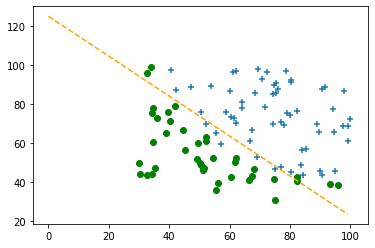

In [602]:
ax = plt.gca()
#ax.autoscale(False)
x1_vals = np.arange(100)
x2_vals = -1/retval[2] * (retval[0] + retval[1] * x1_vals)
plt.plot(x1_vals, x2_vals, '--', c="orange")

plt.scatter(data1[data1['admitted']==1]["exam1_score"],
            data1[data1['admitted']==1]["exam2_score"], marker='+')
plt.scatter(data1[data1['admitted']==0]["exam1_score"],
            data1[data1['admitted']==0]["exam2_score"], c= 'green', marker='o')


## Regularized logistic regression

### Plotting the data

In [608]:
cols2 = ['Microchip_Test_1', 'Microchip_Test_2', 'Accepted']
data2 = pd.read_csv('machine-learning-ex2/ex2/ex2data2.txt', header = None, names = cols2)

In [607]:
data2

,exam1_score,exam2_score,admitted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


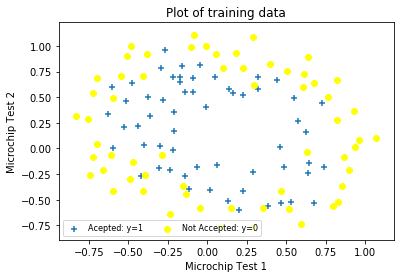

In [612]:
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plot of training data')
plt.legend((x1,x2),('Acepted: y=1', 'Not Accepted: y=0'),loc='lower left', ncol=3, fontsize=8)
plt.show()

### Feature mapping

In [613]:
# we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

In [615]:
from sklearn.preprocessing import PolynomialFeatures  
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [630]:
X2 = data2[['Microchip_Test_1', 'Microchip_Test_2']].values
y2 = data2['Accepted'].to_numpy().reshape(-1,1)

In [625]:
poly = PolynomialFeatures(6)
X2t = poly.fit_transform(X2)

In [638]:
X2t.shape

(118, 28)

In [632]:
y2.shape

(118, 1)

### Cost function and gradient

In [662]:
def costFunctionReg(theta, X, y, bambda):
    gX = X @ theta
    hX = sigmoid(gX)
    n = len(y)
    loss = ((1/n) * (- y.T @ np.log(hX) - (1-y).T @ np.log(1-hX)) +
           bambda / (2 *n) * (theta[1:].T @ theta[1:])).item()
    return loss
    

def gradFunctionReg(theta, X, y, bambda):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX).reshape(-1, 1)   # hX has shape (N,1)
    n = len(y)
    thetap = (np.insert(theta[1:], obj= 0, values = 0)).reshape(-1,1)
    derivative = (1/n) * X.T @ (hX - y) + bambda / n * thetap
    derivative = derivative.squeeze()
    return derivative


In [663]:
# Initialize theta
d = X2t.shape[1]
initial_theta = np.zeros([d, 1])

In [637]:
costFunctionReg(initial_theta, X2t, y2, bambda = 0.5)

0.6931471805599454

In [664]:
gradFunctionReg(initial_theta, X2t, y2, bambda = 0.5)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

### Learning the parameters

In [654]:
bambda = 0.5

In [665]:
retval = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.482934
         Iterations: 59
         Function evaluations: 60
         Gradient evaluations: 60


In [666]:
retval

array([ 1.69991248e+00,  9.72925440e-01,  1.67212125e+00, -2.71227470e+00,
       -1.49290123e+00, -2.11862134e+00,  2.70884646e-01, -5.67763958e-01,
       -5.02056252e-01, -1.94281156e-01, -1.97453078e+00, -2.08421856e-02,
       -8.95028328e-01, -4.75646810e-01, -1.62944985e+00, -3.00810447e-01,
       -2.95953237e-01,  1.00968578e-03, -4.35634896e-01, -4.80985867e-01,
       -4.75116187e-01, -1.42887006e+00,  8.24457081e-02, -4.14312912e-01,
        5.30420292e-02, -4.86692647e-01, -2.77324486e-01, -1.13436781e+00])

### Plot decision boundary

In [692]:
# X - some data in 2dimensional np.array

x1_min, x1_max = data2['Microchip_Test_1'].min() - 1, data2['Microchip_Test_1'].max() + 1
x2_min, x2_max = data2['Microchip_Test_2'].min() - 1, data2['Microchip_Test_2'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.25),
                     np.arange(x2_min, x2_max, 0.25))


In [693]:
x1 = xx1.flatten().reshape(-1,1)
x2 = xx2.flatten().reshape(-1,1)
x3 = np.column_stack((x1,x2))

In [699]:
poly = PolynomialFeatures(6)
X_grid = poly.fit_transform(x3)

In [701]:
Z = sigmoid(X_grid @ retval.reshape(-1,1))
Z = Z.reshape(xx1.shape)

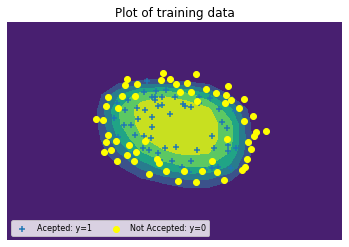

In [705]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx1, xx2, Z)
plt.axis('off')

# Plot also the training points
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plot of training data')
plt.legend((x1,x2),('Acepted: y=1', 'Not Accepted: y=0'),loc='lower left', ncol=3, fontsize=8)
plt.show()

### Change regularization terms

In [706]:
bambda = 0.1
retval1 = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.394594
         Iterations: 91
         Function evaluations: 92
         Gradient evaluations: 92


In [707]:
bambda = 0.8
retval8 = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.514096
         Iterations: 51
         Function evaluations: 52
         Gradient evaluations: 52


(-1.83007, 1.91993, -1.76974, 1.98026)

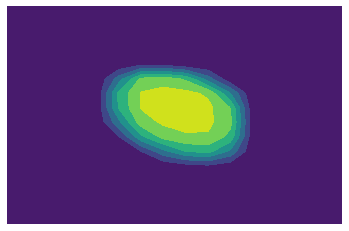

In [708]:
Z1 = sigmoid(X_grid @ retval1.reshape(-1,1))
Z1 = Z1.reshape(xx1.shape)
# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx1, xx2, Z1)
plt.axis('off')


(-1.83007, 1.91993, -1.76974, 1.98026)

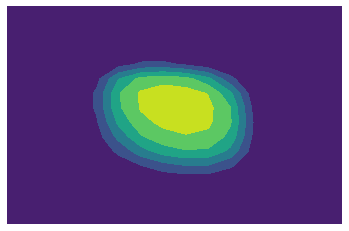

In [711]:
Z8 = sigmoid(X_grid @ retval8.reshape(-1,1))
Z8 = Z8.reshape(xx1.shape)
# Put the result into a color plot
Z8 = Z8.reshape(xx.shape)
plt.contourf(xx1, xx2, Z8)
plt.axis('off')


# Week 4 - Ex3

## Multi-class Classification

### Load data

In [314]:
from scipy.io import loadmat

In [404]:
matdata = loadmat('machine-learning-ex3/ex3/ex3data1.mat')
X = matdata['X']
y = matdata['y']

There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is unrolled into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.

In [325]:
X.shape

(5000, 400)

In [87]:
y.shape

(5000, 1)

### Display image

In [363]:
filename = 'my.png'

In [364]:
def save_images(images,filename):
    
    from PIL import Image
    # Compute number of items to display
    row = int(math.floor(math.sqrt(len(images))))
    col = int(math.ceil(len(images)/row))
    
    # for each image
    w = int(math.sqrt(X.shape[1]))
    h = int(np.round(X.shape[1]/w))
    
    height = row * h
    width = col * w
    output = np.zeros((height, width))

    for i in range(row):
        for j in range(col):
            image = images[i*row+j]
            image = image.reshape(h,w)
            output[i*h:i*h + h,j*w:j*w+w] = image
    output = (output * 255).clip(0,255).astype('uint8')
    output = output.T
    im = Image.fromarray(output)
    im.save(filename)
    im.show()

In [365]:
filename = 'my.png'
save_images(X,filename)

### One-vs-all Classication

In [415]:
y.shape
n = len(y)
y_class = np.unique(y)
y_class

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [416]:
# Add ones to the X data matrix
myX = np.append(np.ones([len(X),1]), X ,1)
myX.shape

(5000, 401)

In [417]:
initial_theta.shape

(400, 1)

In [418]:
def costFunctionReg(theta, X, y, bambda):
    gX = X @ theta
    hX = sigmoid(gX)
    n = len(y)
    loss = ((1/n) * (- y.T @ np.log(hX) - (1-y).T @ np.log(1-hX)) +
           bambda / (2 *n) * (theta[1:].T @ theta[1:])).item()
    return loss
    

def gradFunctionReg(theta, X, y, bambda):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX).reshape(-1, 1)   # hX has shape (N,1)
    n = len(y)
    thetap = (np.insert(theta[1:], obj= 0, values = 0)).reshape(-1,1)
    derivative = (1/n) * X.T @ (hX - y) + bambda / n * thetap
    derivative = derivative.squeeze()
    return derivative

In [420]:
def one_vs_all_logistic_classification(X, y, bambda):
    
    retval_all = []
    
    y_class = np.unique(y)
    
    for k in y_class:
        # Initialize theta
        d = X.shape[1]
        initial_theta = np.zeros([d, 1])
        yk = 1 * (y == k) 
        retval_k = op.fmin_bfgs(f = costFunctionReg, 
                    x0 = initial_theta, 
                    fprime = gradFunctionReg,
                    args = (X, yk, bambda),
                    full_output=False,
                    retall=False)
        retval_all.append(retval_k)
        
    return retval_all

In [421]:
theta_all = one_vs_all_logistic_classification(myX, y, bambda = 0.5)

Optimization terminated successfully.
         Current function value: 0.022429
         Iterations: 203
         Function evaluations: 204
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: 0.062418
         Iterations: 268
         Function evaluations: 269
         Gradient evaluations: 269
Optimization terminated successfully.
         Current function value: 0.066870
         Iterations: 280
         Function evaluations: 281
         Gradient evaluations: 281
Optimization terminated successfully.
         Current function value: 0.045644
         Iterations: 251
         Function evaluations: 252
         Gradient evaluations: 252
Optimization terminated successfully.
         Current function value: 0.068821
         Iterations: 284
         Function evaluations: 285
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: 0.029461
         Iterations: 230
         Function ev

### One-vs-all Prediction

Predict the label for a trained one-vs-all classifier. The labels are in the range 1..K, where K = size(all_theta, 1).  
p = predictOneVsAll(all_theta, X) will return a vector of predictions for each example in the matrix X. 
Note that X contains the examples in rows. 
all_theta is a matrix where the i-th row is a trained logistic regression theta vector for the i-th class. 
You should set p to a vector of values from 1..K 
(e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2 for 4 examples) 

In [422]:
theta_all= np.array(theta_all).T

In [423]:
X_test = X.copy()

In [424]:
def predictOneVsAll(all_theta, X_test):
    
    m = X_test.shape[0]
    ps = []
  
    k = all_theta.shape[1] # k include theta 0 (for 1 term)

    # Add ones to the X data matrix    
    X_test = np.append(np.ones([len(X_test),1]), X_test ,1)
    
    h = sigmoid(X_test @ all_theta)  # hx dimensions: (m, k). m:test size; k: number of classes 

    for i in range(m):
        p = np.argmax(h[i]) +1
        ps.append(p)
    ps = np.array(ps).T
        
    return ps

In [425]:
#================ Predict for One-Vs-All ================
pred = predictOneVsAll(theta_all, X)
pred

array([10, 10, 10, ...,  9,  9,  7])

In [427]:
print('\nTraining Set Accuracy: %f\n', np.mean((pred == y.flatten()) * 1))


Training Set Accuracy: %f
 0.9506


## Neural Networks - Feedforward Propagation and Prediction

In [326]:
## You have been provided with a set of network parameters, theta1, theta2 already trained.
## The parameters have dimensions that are sized for a neural network with 25 units 
## in the second layer and 10 output units (corresponding to the 10 digit classes).

matweights = loadmat('machine-learning-ex3/ex3/ex3weights.mat')
theta1 = matweights['Theta1']
theta2 = matweights['Theta2']

In [327]:
theta1.shape

(25, 401)

In [328]:
theta2.shape

(10, 26)

In [394]:
## Predict the label of an input given a trained neural network
## outputs the predicted label of X given the trained weights of a neural network (Theta1, Theta2)
    
def predict(Theta1, Theta2, X_test):

    ## Useful values
    m = X_test.shape[0] # size of training data
    d = X_test.shape[1] # number of input features, excluding bias term 1
    num_labels = Theta2.shape[0] # dimensions of outputs
    
    ## Initialize all_p. It should be a vector containing labels between 1 to num_labels.
    all_p = []
    
    ## Add bias term to X
    X_test = np.append(np.ones([len(X_test),1]), X_test ,1).T # Shape: (d+!, m) => (401, 5000)
    z2= Theta1 @ X_test # dim: (25, 5000)
    a2 = sigmoid(z2)    # dim: (25, 5000) 
    a2 = np.append(np.ones([1, m]),a2,0) # Add a row of ones to a2 # dim: (26, 5000)
    
    z3 = Theta2 @ a2    # dim: (10, 5000)
    a3 = sigmoid(z3)    # dim: (10, 5000)
    
    for i in range(m):
        ind = np.argmax(a3[:, i])
        p = ind + 1
            
        all_p.append(p)
        
    all_p = np.array(all_p).T
     
    return all_p

In [397]:
# Note that the data stores digit 0 as 10
pred = predict(theta1, theta2, X)
pred

array([10, 10, 10, ...,  9,  9,  9])

In [398]:
print('\nTraining Set Accuracy: %f\n', np.mean((pred == y.flatten()) * 1))


Training Set Accuracy: %f
 0.9752


## Week 5 - Ex4